In [1]:
# Trading Strategy and Backtesting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/nifty_regime_data.csv")

data.head()


,datetime,open_spot,high_spot,low_spot,close_spot,volume_spot,open_fut,high_fut,low_fut,close_fut,...,put_iv,ema_5,ema_15,spot_return,futures_return,futures_basis,pcr_oi,pcr_volume,avg_iv,regime
0,2024-01-01 00:05:00,18000.358450,18002.449807,17999.624023,18001.414868,205219,18000.358450,18002.449807,17999.624023,18014.698774,...,0.176499,17998.780431,17997.957170,0.000220,0.000154,0.000738,3.698113,1.030938,0.213147,1
1,2024-01-01 00:10:00,18001.006138,18013.734743,17998.845623,18007.006533,105033,18001.006138,18013.734743,17998.845623,18011.563403,...,0.183452,18001.522465,17999.088340,0.000311,-0.000174,0.000253,0.638465,1.894637,0.200632,1
2,2024-01-01 00:15:00,18002.529168,18016.658683,17995.751955,18000.069656,173324,18002.529168,18016.658683,17995.751955,18006.700648,...,0.240565,18001.038195,17999.211005,-0.000385,-0.000270,0.000368,1.631559,1.082327,0.236436,0
3,2024-01-01 00:20:00,18002.295015,18002.926738,17986.243301,17992.912251,115689,18002.295015,18002.926738,17986.243301,18013.520479,...,0.187729,17998.329547,17998.423660,-0.000398,0.000379,0.001145,0.975458,1.104844,0.196192,-1
4,2024-01-01 00:25:00,18002.060878,18020.785123,17990.619905,18005.159435,209756,18002.060878,18020.785123,17990.619905,18010.871912,...,0.183388,18000.606177,17999.265632,0.000681,-0.000147,0.000317,1.541274,1.234718,0.207352,1


In [3]:
data["signal"] = 0

data.loc[
    (data["ema_5"] > data["ema_15"]) & (data["regime"] == 1),
    "signal"
] = 1

data.loc[
    (data["ema_5"] < data["ema_15"]) & (data["regime"] == -1),
    "signal"
] = -1

data["signal"].value_counts()


signal
 0    446
 1    278
-1    275
Name: count, dtype: int64

In [4]:
data["signal"] = data["signal"].shift(1)
data.dropna(inplace=True)


In [5]:
data["strategy_return"] = data["signal"] * data["spot_return"]

data[["spot_return", "strategy_return"]].head()


,spot_return,strategy_return
1,0.000311,0.000311
2,-0.000385,-0.000385
3,-0.000398,-0.000000
4,0.000681,-0.000681
5,-0.000261,-0.000261


In [6]:
data["equity_curve"] = (1 + data["strategy_return"]).cumprod()


In [7]:
total_return = data["equity_curve"].iloc[-1] - 1
win_rate = (data["strategy_return"] > 0).mean()

sharpe = (
    data["strategy_return"].mean() /
    data["strategy_return"].std()
) * np.sqrt(252 * 78)

print("Total Return:", round(total_return, 2))
print("Win Rate:", round(win_rate, 2))
print("Sharpe Ratio:", round(sharpe, 2))


Total Return: -0.15
Win Rate: 0.12
Sharpe Ratio: -75.52


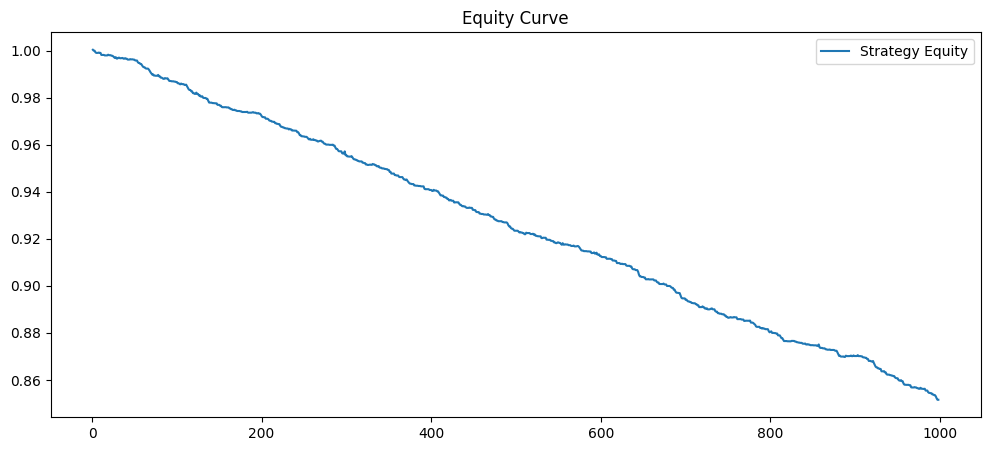

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(data["equity_curve"], label="Strategy Equity")
plt.title("Equity Curve")
plt.legend()
plt.show()


In [9]:
data.to_csv("../results/strategy_results.csv", index=False)
print("Strategy backtest completed")


Strategy backtest completed
